<a href="https://colab.research.google.com/github/Tennis95/Stock-Market-Prediction-using-LSTM/blob/main/Stock_Market_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We install the packages we need, including statsmodels and sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# **Load the data**

We then read the data into our local environment. I'm taking the extra step to make sure the dates are recognized in order

In [ ]:
file_path = 'Stock Market Predicition.xlsx'
stock_data = pd.read_excel('/content/drive/MyDrive/StockMarket.xlsx')

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,...,Daily_Return,Volatility,Price_Change,Anomaly,Volume_Spike,Buy_Signal,Sell_Signal,Trade_Buy_Price,Trade_Sell_Price,Trade_Profit_%
0,2005-02-03,0.000327,0.000327,0.000406,0.000335,0.000268,0.279954,2005,1,3,...,0.000000,0.0,0.000000,False,False,0,0,0.0,0.0,0.0
1,2005-02-03,0.000327,0.000261,0.000406,0.000335,0.000335,0.176700,2005,2,3,...,0.000000,0.0,0.000000,False,False,0,0,0.0,0.0,0.0
2,2005-02-03,0.000327,0.000327,0.000406,0.000402,0.000335,0.545546,2005,2,2,...,0.200000,0.0,0.000067,False,False,0,0,0.0,0.0,0.0
3,2005-02-03,0.000262,0.000261,0.000339,0.000268,0.000268,0.126542,2005,2,1,...,-0.333333,0.0,-0.000134,False,False,0,0,0.0,0.0,0.0
4,2005-02-03,0.000262,0.000196,0.000339,0.000268,0.000268,0.141838,2005,1,31,...,0.000000,0.0,0.000000,False,False,0,0,0.0,0.0,0.0


# **Descriptive Statistics about the Data**

.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail

In [ ]:
stock_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,...,MA_7,MA_30,Daily_Return,Volatility,Price_Change,Buy_Signal,Sell_Signal,Trade_Buy_Price,Trade_Sell_Price,Trade_Profit_%
count,5106,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,...,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000,5106.000000
mean,2015-01-28 16:15:30.669800192,0.072249,0.073461,0.073325,0.073964,0.073824,0.135880,2014.576185,6.527419,15.750490,...,0.075615,0.080354,inf,0.045947,0.000157,0.000392,0.000196,0.000205,0.000221,0.002853
min,2005-02-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,1.000000,1.000000,...,0.000000,0.000000,-1.000000,0.000000,-0.162111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010-01-26 06:00:00,0.001439,0.001438,0.001490,0.001474,0.001340,0.078896,2010.000000,4.000000,8.000000,...,0.001392,0.001293,-0.016555,0.025307,-0.000067,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-02-07 12:00:00,0.003074,0.003138,0.003183,0.003215,0.002947,0.117371,2015.000000,7.000000,16.000000,...,0.003134,0.003219,0.000000,0.035905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020-02-04 18:00:00,0.042566,0.043129,0.043405,0.043660,0.043389,0.168958,2020.000000,10.000000,23.000000,...,0.044560,0.045603,0.022422,0.049292,0.000134,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-01-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2025.000000,12.000000,31.000000,...,1.000000,1.000000,inf,0.560340,0.089027,1.000000,1.000000,0.792270,0.863076,8.937178
std,NaN,0.172285,0.175199,0.174528,0.176183,0.176196,0.088175,5.788889,3.435331,8.758084,...,0.180036,0.190826,NaN,0.045119,0.006452,0.019789,0.013995,0.011640,0.012645,0.147810


# **Information About the Data**

.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5106 entries, 0 to 5105
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5106 non-null   datetime64[ns]
 1   Open              5106 non-null   float64       
 2   High              5106 non-null   float64       
 3   Low               5106 non-null   float64       
 4   Close             5106 non-null   float64       
 5   Adj Close         5106 non-null   float64       
 6   Volume            5106 non-null   float64       
 7   Year              5106 non-null   int64         
 8   Month             5106 non-null   int64         
 9   Day               5106 non-null   int64         
 10  DayOfWeek         5106 non-null   int64         
 11  Close_Lag1        5106 non-null   float64       
 12  Close_Lag7        5106 non-null   float64       
 13  MA_7              5106 non-null   float64       
 14  MA_30             5106 n

# **Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

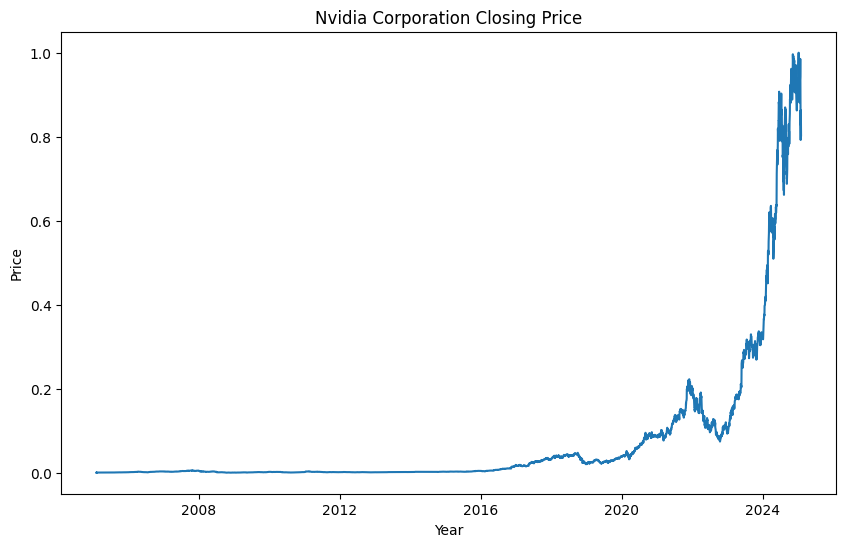

In [ ]:
#plot close price
# Parse dates
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set date as index
stock_data.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
plt.title("Nvidia Corporation Closing Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# **Data Preparation and Scaling**

Here we are using a dataset of Stock Market Predicition using LSTM. We load the dataset of Stock Market Predicition. The “Date” column is converted to datetime format for time series analysis.We scale the data to a range of [0, 1] using MinMaxScaler to help the model train more effectively.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

# **Creating Sequences and Train-Test Split**

Here, we generate sequences of input data and split the dataset into training and testing sets.The dataset is split into training and testing sets, and reshaped to match the LSTM input shape.

In [ ]:
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# **Build LSTM model**

This step involves defining and building the LSTM model architecture.The model consists of two LSTM layers, each with 50 units, and a dropout layer after each to prevent overfitting.The model concludes with a Dense layer to predict a single value (next month’s predicition).

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Training and Evaluating the Model**

In this step, we train the model on the training data and evaluate its performance.The model is trained for 50 epochs using a batch size of 32, with 10% of the training data used for validation.After training, the model is used to make predictions on the test set, and we calculate the Root Mean Squared Error (RMSE) to evaluate performance

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 1.3687e-04 - val_loss: 0.0034
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 8.6871e-06 - val_loss: 0.0013
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 8.6218e-06 - val_loss: 0.0057
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 1.1016e-05 - val_loss: 0.0019
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 9.9511e-06 - val_loss: 0.0024
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 6.1338e-06 - val_loss: 0.0011
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 5.9912e-06 - val_loss: 0.0031
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 6.8958e-06 - val_loss: 7.9948e-04
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 5.0281e-06 - val_loss: 0.0015
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 6.9756e-06 - val_loss: 7.7723e-04
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 4.9527e-06 - va

In [ ]:
# Evaluate and predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


## **Visualizing Model Performance**

In this step, we visualize the actual vs predicted price. A plot is generated to compare the actual stock price against the predicted price, allowing us to evaluate how well the model performs over time.


In [ ]:
# Assuming your stock_data DataFrame has a 'Date' column as index
dates_test = stock_data.index[train_size + sequence_length:]

print(len(dates_test), len(y_test), len(predictions))

1010 1010 1010


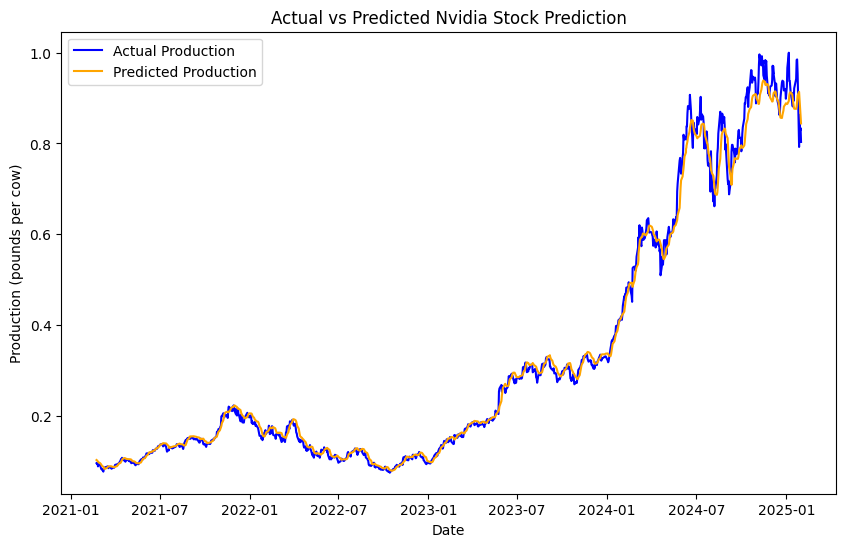

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_test, label='Actual Production', color='blue')
plt.plot(dates_test, predictions, label='Predicted Production', color='orange')
plt.title('Actual vs Predicted Nvidia Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Production (pounds per cow)')
plt.legend()
plt.show()

# **ARIMA for Time Series Forecasting**

**Install packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## **Check for stationarity and perform differencing if necessary**

While ARIMA models can deal with non-stationarity up to a point, they cannot effectively account for time-varying variance. In other words, for an ARIMA model to really work, the data has to be stationary.Looking at the plot, above, we can see that the data is, in fact, not stationary because there is a clear trend. Also, it looks like there is non-constant variance at different time points. We can use the Augmented Dickey-Fuller test to test our intuition and see if our data has a constant mean and variance, and put numbers to it

In [ ]:
# Perform the Augmented Dickey-Fuller test on the original series
result_original = adfuller(stock_data["Close"])

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply first-order differencing
stock_data['Close_Diff'] = stock_data['Close'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(stock_data["Close_Diff"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")


ADF Statistic (Original): 1.1706
p-value (Original): 0.9958
Interpretation: The original series is Non-Stationary.

ADF Statistic (Differenced): -9.5058
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


## Forecasting

To forecast using an ARIMA model, start by using the fitted model to predict future values based on the data. Once predictions are made, it's helpful to visualize them by plotting the predicted values alongside the actual values. This is accomplished because we use a train/test workflow, where the data is split into training and testing sets

# **Use a train and test workflow**

Our first step is to split the data into training and testing versions

In [ ]:
# Split data into train and test
train_size = int(len(stock_data) * 0.8)
train, test = stock_data.iloc[:train_size], stock_data.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train["Close"], order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## **Visualize our time series**

Our next step is to create our forecast and also to visually inspect it. We can see how our forecast performs against the testing version of our data

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


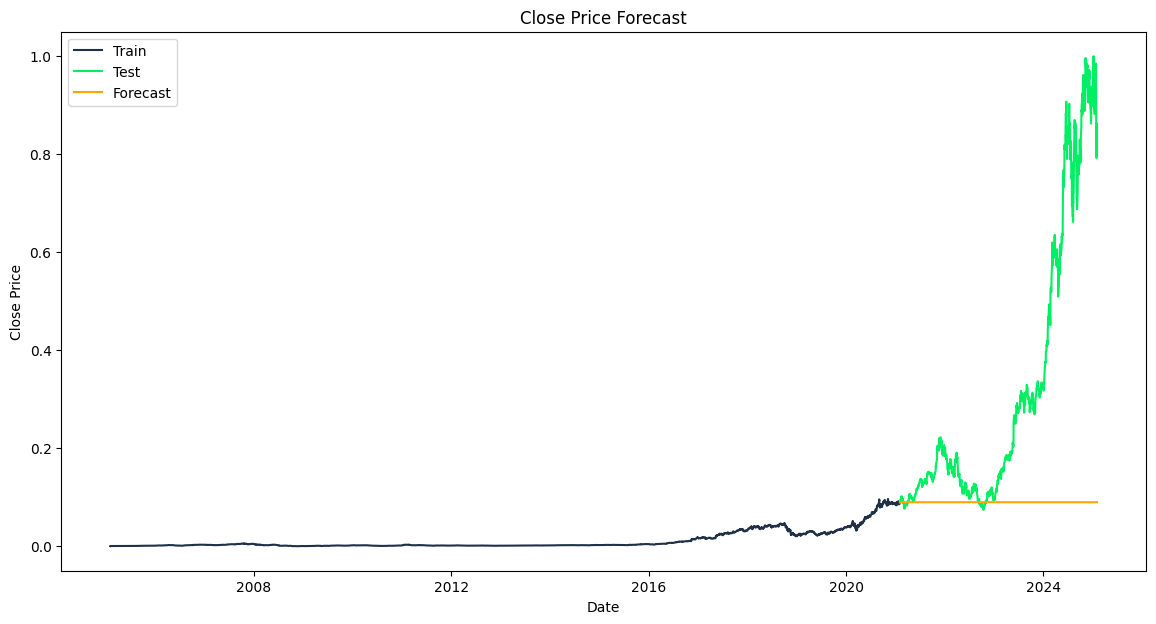

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Close"], label='Train', color='#203147')
plt.plot(test.index, test["Close"], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# **Evaluate model statistics**

We check out the AIC and BIC model statistics. Lower values mean the model fits better, but we might also compare the results with those from simpler models to avoid overfitting.

In [ ]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: -48106.405000659215
BIC: -48087.461238785254


In [ ]:
forecast = forecast[:len(test)]
test_close = test["Close"][:len(forecast)]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_close, forecast))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.3613
